In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
population_df = pd.read_csv('PopulationPerCountry.csv', skiprows = range(0,4))
population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN,NaN


In [4]:
GDP_df = pd.read_csv('GDP by Country.csv', skiprows = range(0,4))
GDP_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN,NaN


In [5]:
GDPData_df = pd.merge(GDP_df, population_df, on= ['Country Code','Country Name'], how='inner')
GDPData_df.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,Unnamed: 62_y
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN,NaN


In [6]:
GDPDataCurated_df = GDPData_df.drop(['Indicator Name_x','Indicator Code_x','Indicator Name_y','Indicator Code_y','Unnamed: 62_y','Unnamed: 62_x'], axis = 1)
GDPDataCurated_df.head()

,Country Name,Country Code,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,1967_x,...,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


In [7]:
GDPperCapita_df = pd.DataFrame()
for col in GDPDataCurated_df.columns:
    if col.endswith("Name"):
        country = col[:]
        GDPperCapita_df[country] = GDPDataCurated_df[country]
    if col.endswith("_x"):
        year = col[:4]
        GDPperCapita_df[year] = GDPDataCurated_df[year + '_x']/GDPDataCurated_df[year + '_y']
    if col.endswith("Code"):
        code = col[:]
        GDPperCapita_df['Units:- US$/person' + code] = GDPDataCurated_df[code]
        
GDPDataCurated_df.head()

,Country Name,Country Code,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,1967_x,...,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


In [8]:
GDPperCapita_df.head() 

,Country Name,Units:- US$/personCountry Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,161.322,...,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3308.700233,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3934.895394,4124.982390,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47785.659086,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,36988.622030,NaN


In [9]:
GDP_Stacked_df = pd.melt(GDPperCapita_df,id_vars=['Country Name','Units:- US$/personCountry Code'])
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,59.777327
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [10]:
WomenMakingInformedChoices_df = pd.read_csv('WomenMakingInformedChoicestoReproductiveHealthCare.csv', skiprows = range(0,4))
WomenMakingInformedChoices_df = pd.melt(WomenMakingInformedChoices_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
WomenMakingInformedChoices_df

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
1,Afghanistan,AFG,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
2,Angola,AGO,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
3,Albania,ALB,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
4,Andorra,AND,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
5,Arab World,ARB,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
6,United Arab Emirates,ARE,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
7,Argentina,ARG,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
8,Armenia,ARM,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
9,American Samoa,ASM,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN


In [11]:
RuralPopulationPerCent_df = pd.read_csv('RuralPopulationofTotalPopulation.csv', skiprows = range(0,4))
RuralPopulationPerCent_df = RuralPopulationPerCent_df.drop(['Unnamed: 62'],axis = 1)
RuralPopulationPerCent_df = pd.melt(RuralPopulationPerCent_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
RuralPopulationPerCent_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,49.224
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.779
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,89.565
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,69.295
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,41.550


In [13]:
PublicEduRatioGDP_df = pd.read_csv('public-education-expenditure-as-share-of-gdp.csv')
PublicEduRatioGDP_df.head()

,Entity,Code,Year,Public Expenditure on Education (percent of GDP)
0,Australia,AUS,1937,0.7
1,Australia,AUS,1960,1.4
2,Australia,AUS,1980,5.5
3,Australia,AUS,1993,6.0
4,Austria,AUT,1937,2.5


In [14]:
LegalRightsStrength_df = pd.read_csv('LegalRightsStrengthIndex.csv', skiprows = range(0,4))
LegalRightsStrength_df = pd.melt(LegalRightsStrength_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
LegalRightsStrength_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
1,Afghanistan,AFG,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
2,Angola,AGO,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
3,Albania,ALB,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
4,Andorra,AND,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN


In [15]:
CreditToPrivateSector_df = pd.read_csv('DomesticCreditToPrivateSector.csv', skiprows = range(0,4))
CreditToPrivateSector_df = CreditToPrivateSector_df.drop(['Unnamed: 62'],axis = 1)
CreditToPrivateSector_df = pd.melt(CreditToPrivateSector_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
CreditToPrivateSector_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
1,Afghanistan,AFG,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,9.272727
2,Angola,AGO,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
3,Albania,ALB,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
4,Andorra,AND,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN


In [16]:
BirthsAttendedbySkilledStaff_df = pd.read_csv('BirthsAttendedbySkilledHealthStaffofTotal.csv', skiprows = range(0,4))
BirthsAttendedbySkilledStaff_df = pd.melt(BirthsAttendedbySkilledStaff_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
BirthsAttendedbySkilledStaff_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
1,Afghanistan,AFG,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
2,Angola,AGO,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
3,Albania,ALB,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
4,Andorra,AND,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN


In [17]:
ATMMachinesRatio_df = pd.read_csv('ATMMachines_Per100000Adults.csv', skiprows = range(0,4))
ATMMachinesRatio_df = pd.melt(ATMMachinesRatio_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
ATMMachinesRatio_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
1,Afghanistan,AFG,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
2,Angola,AGO,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
3,Albania,ALB,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
4,Andorra,AND,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN


In [18]:
AgriculturalMachines_df = pd.read_csv('AgriculturalMachinery_PerUnitofArableLand.csv', skiprows = range(0,4))
AgriculturalMachines_df = AgriculturalMachines_df.drop(['Unnamed: 62'],axis = 1)
AgriculturalMachines_df = pd.melt(AgriculturalMachines_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
AgriculturalMachines_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
1,Afghanistan,AFG,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
2,Angola,AGO,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
3,Albania,ALB,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
4,Andorra,AND,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN


In [19]:
LiteracyRateAdult_df = pd.read_csv('AdultPopulation_Literate.csv', skiprows = range(0,4))
#AgriculturalMachines_df = AgriculturalMachines_df.drop(['Unnamed: 62'],axis = 1)
LiteracyRateAdult_df = pd.melt(LiteracyRateAdult_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
LiteracyRateAdult_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
1,Afghanistan,AFG,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
2,Angola,AGO,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
3,Albania,ALB,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
4,Andorra,AND,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN


In [20]:
AccountsRatioFinancialInst_df = pd.read_csv('AccountAtaFinancialInstitutionMale15Adults.csv', skiprows = range(0,4))
AccountsRatioFinancialInst_df = AccountsRatioFinancialInst_df.drop(['Unnamed: 62'],axis = 1)
AccountsRatioFinancialInst_df = pd.melt(AccountsRatioFinancialInst_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
AccountsRatioFinancialInst_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
1,Afghanistan,AFG,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
2,Angola,AGO,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
3,Albania,ALB,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
4,Andorra,AND,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN


In [21]:
GDP_Stacked_df['WomenMakingInformedChoices_df'] = WomenMakingInformedChoices_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df
0,Aruba,ABW,1960,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN
2,Angola,AGO,1960,NaN,NaN
3,Albania,ALB,1960,NaN,NaN
4,Andorra,AND,1960,NaN,NaN


In [22]:
GDP_Stacked_df['RuralPopulationPerCent_df'] = RuralPopulationPerCent_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df
0,Aruba,ABW,1960,NaN,NaN,49.224
1,Afghanistan,AFG,1960,59.777327,NaN,91.779
2,Angola,AGO,1960,NaN,NaN,89.565
3,Albania,ALB,1960,NaN,NaN,69.295
4,Andorra,AND,1960,NaN,NaN,41.550


In [23]:
GDP_Stacked_df['LegalRightsStrength_df'] = LegalRightsStrength_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN


In [24]:
GDP_Stacked_df['CreditToPrivateSector_df'] = CreditToPrivateSector_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df,CreditToPrivateSector_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN


In [25]:
GDP_Stacked_df['BirthsAttendedbySkilledStaff_df'] = BirthsAttendedbySkilledStaff_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df,CreditToPrivateSector_df,BirthsAttendedbySkilledStaff_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN


In [26]:
GDP_Stacked_df['ATMMachinesRatio_df'] = ATMMachinesRatio_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df,CreditToPrivateSector_df,BirthsAttendedbySkilledStaff_df,ATMMachinesRatio_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN


In [27]:
GDP_Stacked_df['AgriculturalMachines_df'] = AgriculturalMachines_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df,CreditToPrivateSector_df,BirthsAttendedbySkilledStaff_df,ATMMachinesRatio_df,AgriculturalMachines_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN


In [28]:
GDP_Stacked_df['LiteracyRateAdult_df'] = LiteracyRateAdult_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df,CreditToPrivateSector_df,BirthsAttendedbySkilledStaff_df,ATMMachinesRatio_df,AgriculturalMachines_df,LiteracyRateAdult_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
GDP_Stacked_df['AccountsRatioFinancialInst_df'] = AccountsRatioFinancialInst_df.value
GDP_Stacked_df

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df,CreditToPrivateSector_df,BirthsAttendedbySkilledStaff_df,ATMMachinesRatio_df,AgriculturalMachines_df,LiteracyRateAdult_df,AccountsRatioFinancialInst_df
0,Aruba,ABW,1960,NaN,NaN,49.224000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779000,NaN,9.272727,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,1960,NaN,NaN,68.708026,NaN,12.245329,NaN,NaN,NaN,NaN,NaN
6,United Arab Emirates,ARE,1960,NaN,NaN,26.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,1960,NaN,NaN,26.389000,NaN,13.611244,NaN,NaN,NaN,NaN,NaN
8,Armenia,ARM,1960,NaN,NaN,48.725000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,American Samoa,ASM,1960,NaN,NaN,33.789000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


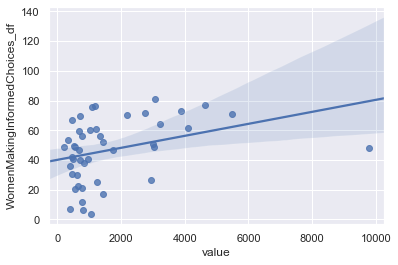

In [30]:
sns.regplot(x="value", y="WomenMakingInformedChoices_df", data=GDP_Stacked_df)

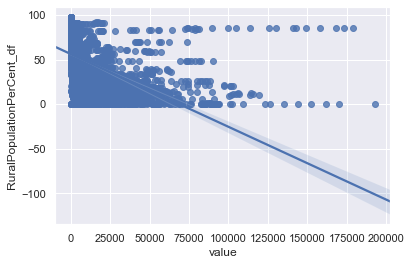

In [34]:
sns.regplot(x="value", y="RuralPopulationPerCent_df", data=GDP_Stacked_df);

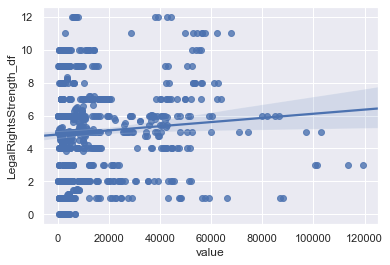

In [33]:
sns.regplot(x="value", y="LegalRightsStrength_df", data=GDP_Stacked_df);

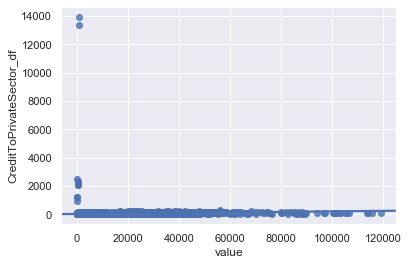

In [36]:
sns.regplot(x="value", y="CreditToPrivateSector_df", data=GDP_Stacked_df);

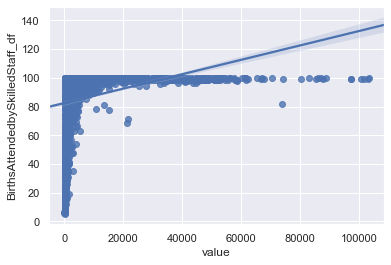

In [37]:
sns.regplot(x="value", y="BirthsAttendedbySkilledStaff_df", data=GDP_Stacked_df);

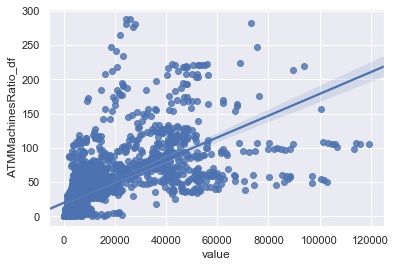

In [38]:
sns.regplot(x="value", y="ATMMachinesRatio_df", data=GDP_Stacked_df);

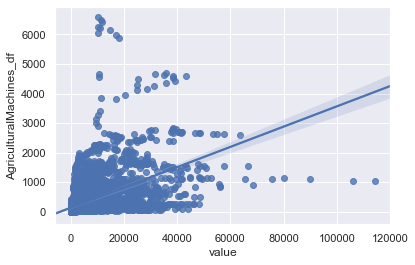

In [39]:
sns.regplot(x="value", y="AgriculturalMachines_df", data=GDP_Stacked_df);

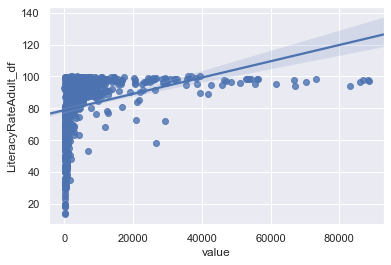

In [40]:
sns.regplot(x="value", y="LiteracyRateAdult_df", data=GDP_Stacked_df);

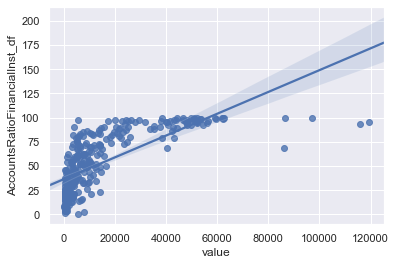

In [41]:
sns.regplot(x="value", y="AccountsRatioFinancialInst_df", data=GDP_Stacked_df);

In [42]:
print(GDP_Stacked_df.isnull().any())

Country Name                       False
Units:- US$/personCountry Code     False
variable                           False
value                               True
WomenMakingInformedChoices_df       True
RuralPopulationPerCent_df           True
LegalRightsStrength_df              True
CreditToPrivateSector_df            True
BirthsAttendedbySkilledStaff_df     True
ATMMachinesRatio_df                 True
AgriculturalMachines_df             True
LiteracyRateAdult_df                True
AccountsRatioFinancialInst_df       True
dtype: bool


In [43]:
#Counting missing values in a column

GDP_Stacked_df.dropna(subset=['value'],inplace = True)
print(GDP_Stacked_df['value'].isnull().sum())
print(GDP_Stacked_df['value'].notnull().sum())

0
11504


In [44]:
# Counting missing values in a column
GDP_Stacked_df['WomenMakingInformedChoices_df'].fillna(value=GDP_Stacked_df['WomenMakingInformedChoices_df'].mean(),inplace=True)
print(GDP_Stacked_df['WomenMakingInformedChoices_df'].isnull().sum())
print(GDP_Stacked_df['WomenMakingInformedChoices_df'].notnull().sum())

0
11504


In [45]:
GDP_Stacked_df['RuralPopulationPerCent_df'].fillna(value=GDP_Stacked_df['RuralPopulationPerCent_df'].mean(),inplace=True)
print(GDP_Stacked_df['RuralPopulationPerCent_df'].isnull().sum())
print(GDP_Stacked_df['RuralPopulationPerCent_df'].notnull().sum())

0
11504


In [46]:
GDP_Stacked_df['LegalRightsStrength_df'].fillna(value=GDP_Stacked_df['LegalRightsStrength_df'].mean(),inplace=True)
print(GDP_Stacked_df['LegalRightsStrength_df'].isnull().sum())
print(GDP_Stacked_df['LegalRightsStrength_df'].notnull().sum())

0
11504


In [47]:
GDP_Stacked_df['CreditToPrivateSector_df'].fillna(value=GDP_Stacked_df['CreditToPrivateSector_df'].mean(),inplace=True)
print(GDP_Stacked_df['CreditToPrivateSector_df'].isnull().sum())
print(GDP_Stacked_df['CreditToPrivateSector_df'].notnull().sum())

0
11504


In [48]:
GDP_Stacked_df['BirthsAttendedbySkilledStaff_df'].fillna(value=GDP_Stacked_df['BirthsAttendedbySkilledStaff_df'].mean(),inplace=True)
print(GDP_Stacked_df['BirthsAttendedbySkilledStaff_df'].isnull().sum())
print(GDP_Stacked_df['BirthsAttendedbySkilledStaff_df'].notnull().sum())

0
11504


In [49]:
GDP_Stacked_df['ATMMachinesRatio_df'].fillna(value=GDP_Stacked_df['ATMMachinesRatio_df'].mean(),inplace=True)
print(GDP_Stacked_df['ATMMachinesRatio_df'].isnull().sum())
print(GDP_Stacked_df['ATMMachinesRatio_df'].notnull().sum())

0
11504


In [50]:
GDP_Stacked_df['AgriculturalMachines_df'].fillna(value=GDP_Stacked_df['AgriculturalMachines_df'].mean(),inplace=True)
print(GDP_Stacked_df['AgriculturalMachines_df'].isnull().sum())
print(GDP_Stacked_df['AgriculturalMachines_df'].notnull().sum())

0
11504


In [51]:
GDP_Stacked_df['LiteracyRateAdult_df'].fillna(value=GDP_Stacked_df['LiteracyRateAdult_df'].mean(),inplace=True)
print(GDP_Stacked_df['LiteracyRateAdult_df'].isnull().sum())
print(GDP_Stacked_df['LiteracyRateAdult_df'].notnull().sum())

0
11504


In [52]:
GDP_Stacked_df['AccountsRatioFinancialInst_df'].fillna(value=GDP_Stacked_df['AccountsRatioFinancialInst_df'].mean(),inplace=True)
print(GDP_Stacked_df['AccountsRatioFinancialInst_df'].isnull().sum())
print(GDP_Stacked_df['AccountsRatioFinancialInst_df'].notnull().sum())

0
11504


In [53]:
X = GDP_Stacked_df[['CreditToPrivateSector_df','WomenMakingInformedChoices_df','RuralPopulationPerCent_df','BirthsAttendedbySkilledStaff_df','ATMMachinesRatio_df','AgriculturalMachines_df','LiteracyRateAdult_df','AccountsRatioFinancialInst_df','LegalRightsStrength_df']]
X = np.array(X)
X

array([[  9.2727267 ,  46.75333333,  91.779     , ...,  81.96585703,
         52.4933451 ,   5.01029011],
       [ 19.1290206 ,  46.75333333,  18.471     , ...,  81.96585703,
         52.4933451 ,   5.01029011],
       [ 44.70480425,  46.75333333,  35.28      , ...,  81.96585703,
         52.4933451 ,   5.01029011],
       ...,
       [144.41424196,  46.75333333,  34.705     , ...,  81.96585703,
         52.4933451 ,   5.        ],
       [ 12.0392528 ,  46.75333333,  58.621     , ...,  81.96585703,
         52.4933451 ,   7.        ],
       [ 44.70480425,  46.75333333,  67.723     , ...,  81.96585703,
         52.4933451 ,   5.        ]])

In [54]:
y = GDP_Stacked_df['value']
y = np.array(y)
y

array([  59.77732651, 1809.31145171,  935.46042685, ..., 5284.60360431,
       1269.57353679, 1029.07664868])

In [55]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.15/0.85, random_state=0)

In [56]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [57]:
y_pred = model.predict(X_val)
y_actual = Y_val
mean_squared_error(y_actual, y_pred)

50851927.976040676

0.7412931092173006


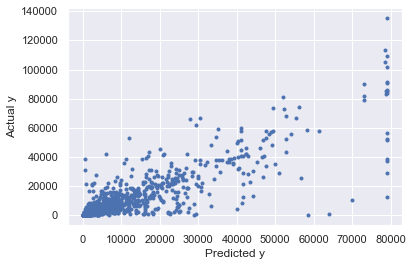

In [58]:
# Test R^2
print(model.score(X_val, y_actual))
plt.scatter(y_pred, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()

In [59]:
y_pred_test = model.predict(X_test)
y_actual_test = Y_test
mean_squared_error(y_actual_test, y_pred_test)

59099891.500984535

0.7362434283847245


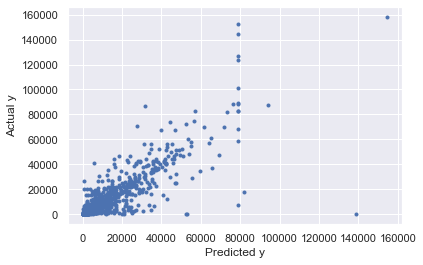

In [60]:
print(model.score(X_test, y_actual_test))
plt.scatter(y_pred_test, y_actual_test, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()

In [61]:
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression

In [62]:
lreg = LinearRegression()

In [63]:
X = GDP_Stacked_df[['CreditToPrivateSector_df','WomenMakingInformedChoices_df','RuralPopulationPerCent_df','BirthsAttendedbySkilledStaff_df','ATMMachinesRatio_df','AgriculturalMachines_df','LiteracyRateAdult_df','AccountsRatioFinancialInst_df','LegalRightsStrength_df']]
# splitting into training and val sets for cross validation
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.15/0.85, random_state=0)

In [64]:
#training the model
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
pred = lreg.predict(X_val)

In [67]:
# calculating MSE
mse = np.mean((pred - Y_val)**2)
mse

129254376.83903672

In [68]:
from pandas import Series, DataFrame
lreg.score(X_val,Y_val)

0.3424241856112592

Text(0.5, 1.0, 'Residual plot')

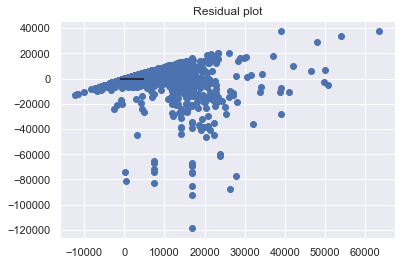

In [69]:
x_plot = plt.scatter(pred, (pred - Y_val), c='b')
plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

In [71]:
predictors = X_train.columns

In [72]:
coef = Series(lreg.coef_,predictors).sort_values()

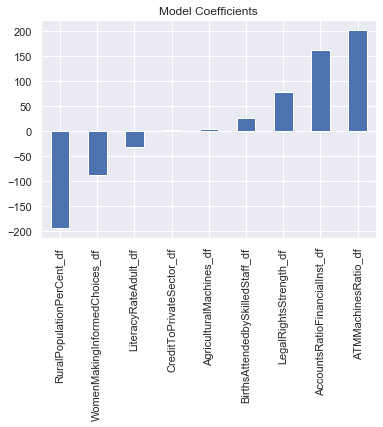

In [73]:
coef.plot(kind='bar', title='Model Coefficients')

In [74]:
#Ridge Regression 

from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.0001, normalize=True)
ridgeReg.fit(X_train,Y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [75]:
pred = ridgeReg.predict(X_val)

In [76]:
mse = np.mean((pred - Y_val)**2)

In [77]:
ridgeReg.score(X_train,Y_train)

0.32390775950157114

In [78]:
ridgeReg.score(X_test,Y_test)

0.31430657841416754

In [79]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [80]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.15/0.85, random_state=0)

In [81]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor()
regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [82]:
regr_1.score(X_val,Y_val)

0.39344647109550046

In [83]:
regr_2.score(X_val,Y_val)

0.6966190407564165

In [84]:
regr_2.score(X_test,Y_test)

0.6364230276652487

In [85]:
regr_2.feature_importances_

array([1.22779908e-01, 3.76253690e-07, 5.75392617e-01, 2.50605944e-02,
       1.99659768e-01, 6.83102102e-02, 3.98937827e-03, 5.95905285e-04,
       4.21124159e-03])

In [86]:
list(zip(regr_2.feature_importances_,X.columns))

[(0.1227799083438554, 'CreditToPrivateSector_df'),
 (3.762536904078959e-07, 'WomenMakingInformedChoices_df'),
 (0.5753926173739079, 'RuralPopulationPerCent_df'),
 (0.025060594440316095, 'BirthsAttendedbySkilledStaff_df'),
 (0.19965976823737888, 'ATMMachinesRatio_df'),
 (0.06831021020012634, 'AgriculturalMachines_df'),
 (0.003989378273481478, 'LiteracyRateAdult_df'),
 (0.0005959052846790719, 'AccountsRatioFinancialInst_df'),
 (0.004211241592564424, 'LegalRightsStrength_df')]

In [87]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

In [88]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.15/0.85, random_state=0)

In [89]:
regr_1 = RandomForestRegressor(n_estimators=500, min_samples_leaf=1)
regr_2 = RandomForestRegressor()
regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)

C:\Users\eshaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [90]:
regr_1.score(X_val,Y_val)

0.7802223059800127

In [91]:
regr_2.score(X_val,Y_val)

0.7730373444801288

In [92]:
regr_2.feature_importances_

array([1.29764136e-01, 1.33709022e-05, 5.74782624e-01, 1.80926127e-02,
       1.74347991e-01, 8.34646056e-02, 5.76168390e-03, 3.29666615e-03,
       1.04763091e-02])

In [93]:
list(zip(regr_2.feature_importances_,X.columns))

[(0.12976413573742457, 'CreditToPrivateSector_df'),
 (1.3370902167013555e-05, 'WomenMakingInformedChoices_df'),
 (0.5747826244902213, 'RuralPopulationPerCent_df'),
 (0.01809261270182621, 'BirthsAttendedbySkilledStaff_df'),
 (0.17434799141722704, 'ATMMachinesRatio_df'),
 (0.08346460556630173, 'AgriculturalMachines_df'),
 (0.005761683899479101, 'LiteracyRateAdult_df'),
 (0.003296666145051779, 'AccountsRatioFinancialInst_df'),
 (0.010476309140301242, 'LegalRightsStrength_df')]

In [94]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

In [95]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.15/0.85, random_state=0)

In [96]:
regr_1 = RandomForestRegressor(n_estimators=500, min_samples_leaf=1)
regr_2 = RandomForestRegressor()
regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)

C:\Users\eshaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [97]:
regr_1.score(X_val,Y_val)

0.7821732523600187

In [98]:
regr_2.score(X_val,Y_val)

0.7439929899661446

In [99]:
regr_2.feature_importances_

array([1.29221881e-01, 7.53669883e-06, 5.71754869e-01, 2.36961947e-02,
       1.74856170e-01, 8.35108295e-02, 3.63611257e-03, 3.65848990e-03,
       9.65791636e-03])

In [100]:
list(zip(regr_2.feature_importances_,X.columns))

[(0.1292218813852338, 'CreditToPrivateSector_df'),
 (7.536698832761555e-06, 'WomenMakingInformedChoices_df'),
 (0.5717548693966813, 'RuralPopulationPerCent_df'),
 (0.02369619466483192, 'BirthsAttendedbySkilledStaff_df'),
 (0.17485616954229596, 'ATMMachinesRatio_df'),
 (0.08351082947230937, 'AgriculturalMachines_df'),
 (0.0036361125709322597, 'LiteracyRateAdult_df'),
 (0.003658489904539153, 'AccountsRatioFinancialInst_df'),
 (0.009657916364343565, 'LegalRightsStrength_df')]

In [101]:
regr_1.score(X_test,Y_test)

0.7212772380203271

In [102]:
regr_2.feature_importances_

array([1.29221881e-01, 7.53669883e-06, 5.71754869e-01, 2.36961947e-02,
       1.74856170e-01, 8.35108295e-02, 3.63611257e-03, 3.65848990e-03,
       9.65791636e-03])

In [103]:
list(zip(regr_1.feature_importances_,X.columns))

[(0.12948644452251928, 'CreditToPrivateSector_df'),
 (3.983257225595453e-06, 'WomenMakingInformedChoices_df'),
 (0.5708294361490397, 'RuralPopulationPerCent_df'),
 (0.02116857392350324, 'BirthsAttendedbySkilledStaff_df'),
 (0.17842285967200472, 'ATMMachinesRatio_df'),
 (0.08182831566156211, 'AgriculturalMachines_df'),
 (0.004962613714083898, 'LiteracyRateAdult_df'),
 (0.003914227793161133, 'AccountsRatioFinancialInst_df'),
 (0.009383545306900248, 'LegalRightsStrength_df')]